In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
person = 'A'
reference = pd.read_csv('data/Refrence.csv')
# 计算每个个体的基因座上的等位基因
A_refrence_data = reference[reference['sample'] == person]
alleles_dict = {A_refrence_data['marker']:[A_refrence_data['allele1'],A_refrence_data['allele2']] for index,A_refrence_data in A_refrence_data.iterrows()}
alleles_dict

{'D3S1358': [16.0, 16.0],
 'vWA': [14.0, 19.0],
 'D16S539': [11.0, 12.0],
 'CSF1PO': [12.0, 14.0],
 'TPOX': [8.0, 8.0],
 'Yindel': [2.0, 2.0],
 'D8S1179': [10.0, 12.0],
 'D21S11': [29.0, 33.2],
 'D18S51': [14.0, 15.0],
 'DYS391': [9.0, 9.0],
 'D2S441': [10.0, 10.0],
 'D19S433': [13.0, 13.0],
 'TH01': [7.0, 9.0],
 'FGA': [22.0, 24.0],
 'D22S1045': [16.0, 17.0],
 'D5S818': [11.0, 12.0],
 'D13S317': [11.0, 11.0],
 'D7S820': [11.0, 11.0],
 'SE33': [25.2, 26.2],
 'D10S1248': [13.0, 13.0],
 'D1S1656': [15.0, 16.0],
 'D12S391': [18.0, 22.0],
 'D2S1338': [23.0, 26.0]}

In [18]:
init_data = pd.read_csv(f'data/{person}25pg.hid_Genotype.csv', usecols=['Marker', 'Allele', 'Height'])
init_data['Height'] = init_data['Height'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
init_data

,Marker,Allele,Height
0,D3S1358,9.0,7.0
1,D3S1358,10.0,11.0
2,D3S1358,11.0,9.0
3,D3S1358,12.0,0.0
4,D3S1358,13.0,9.0
...,...,...,...
336,D2S1338,24.0,20.0
337,D2S1338,25.0,48.0
338,D2S1338,26.0,394.0
339,D2S1338,27.0,15.0


In [19]:
threshold = 1
threshold_list = []
accurate_list = []
accurate_rate_list = []
error_list = []
error_rate_list = []
while threshold <= 500:
    error = 0
    accurate = 0
    processed_data = init_data[init_data['Height'] < threshold]
    for index, row in processed_data.iterrows():
        if row['Allele'] == alleles_dict[row['Marker']][0] or row['Allele'] == alleles_dict[row['Marker']][1]:
            error += 1
        else:
            accurate += 1
    threshold_list.append(threshold)
    error_list.append(error)
    accurate_list.append(accurate)
    error_rate_list.append(error / len(processed_data))
    accurate_rate_list.append(accurate / len(processed_data))
    threshold += 1

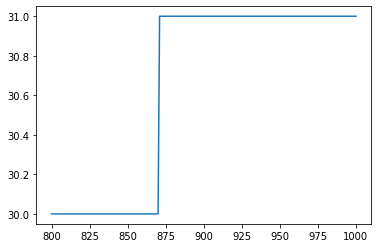

In [20]:
plt.plot(threshold_list, error_list, label='error_rate')
# plt.plot(threshold_list, accurate_rate_list, label='accurate_rate')